# What's a Ballad?

## Marla Seth
## ibc346

#### all raw data scraped from https://www.poetryfoundation.org/
#### processed data can be found at https://github.com/marlaseth/IS-6713-Final-Project

# Part One - getting and cleaning the data

####  Loading Needed Urls into lists:

In [1]:
goldstandard_urls = [["Lady of Shalott","https://www.poetryfoundation.org/poems/45360/the-lady-of-shalott-1842","ballad"],[
    "The Raven","https://www.poetryfoundation.org/poems/48860/the-raven","ballad"],[
    "Lady of the Lake: Boat Song","https://www.poetryfoundation.org/poems/52371/the-lady-of-the-lake-boat-song","ballad"],[
    "After Apple-Picking","https://www.poetryfoundation.org/poems/44259/after-apple-picking","not a ballad"],[
    "Parting Song","https://www.poetryfoundation.org/poetrymagazine/poems/51181/parting-song","not a ballad"],[
    "Fund Drive","https://www.poetryfoundation.org/poems/146042/fund-drive","not a ballad"]]

poem_urls = [["The Hunting of the Snark","https://www.poetryfoundation.org/poems/43909/the-hunting-of-the-snark","ballad"],[
    "Casey at the bat","https://www.poetryfoundation.org/poems/45398/casey-at-the-bat","ballad"],[
    "Annabel Lee","https://www.poetryfoundation.org/poems/44885/annabel-lee","not a ballad"],[
    "The Best Game the Fairies Play","https://www.poetryfoundation.org/poems/42921/the-best-game-the-fairies-play","not a ballad"],[
    "The Cremation of Sam McGee","https://www.poetryfoundation.org/poems/45081/the-cremation-of-sam-mcgee","ballad"],[
    "Don’t Worry if Your Job is Small","https://www.poetryfoundation.org/poems/42909/dont-worry-if-your-job-is-small","not a ballad"],[
    "The Highwayman","https://www.poetryfoundation.org/poems/43187/the-highwayman","ballad"],[
    "I Love to Do My Homework","https://www.poetryfoundation.org/poems/42903/i-love-to-do-my-homework","not a ballad"],[
    "Jabberwocky","https://www.poetryfoundation.org/poems/42916/jabberwocky","ballad"],[
    "John Henry","https://www.poetryfoundation.org/poems/42897/john-henry","ballad"],[
    "Little Robin Redbreast","https://www.poetryfoundation.org/poems/42915/little-robin-redbreast","ballad"],[
    "Mr. Nobody","https://www.poetryfoundation.org/poems/42914/mr-nobody","not a ballad"],[
    "The Owl and the Pussy Cat","https://www.poetryfoundation.org/poems/43188/the-owl-and-the-pussy-cat","ballad"],[
    "A Peanut Sat on a Railroad Track","https://www.poetryfoundation.org/poems/42898/a-peanut-sat-on-a-railroad-track-","not a ballad"],[
    "Pumberly Pott’s Unpredictable Niece","https://www.poetryfoundation.org/poems/48011/pumberly-potts-unpredictable-niece","not a ballad"],[
    "A Red, Red Rose","https://www.poetryfoundation.org/poems/43812/a-red-red-rose","not a ballad"],[
    "Sing a Song of Sixpence","https://www.poetryfoundation.org/poems/42900/sing-a-song-of-sixpence","not a ballad"],[
    "So We’ll Go No More a Roving","https://www.poetryfoundation.org/poems/43845/so-well-go-no-more-a-roving","not a ballad"]]

print(goldstandard_urls[0:1])
print(poem_urls[0:1])

[['Lady of Shalott', 'https://www.poetryfoundation.org/poems/45360/the-lady-of-shalott-1842', 'ballad']]
[['The Hunting of the Snark', 'https://www.poetryfoundation.org/poems/43909/the-hunting-of-the-snark', 'ballad']]


#### Defining function to scrape and return poem text

In [2]:
import requests
from bs4 import BeautifulSoup

def scrape_to_text(url):
    url = url
    response = requests.get(url)
    page_content = BeautifulSoup(response.text, 'html.parser')
    poemtext = page_content.find_all(text=True)
    poemtext_reduced = poemtext[785:]
    
    newlinecount = 0
    poemtext_isolated = []
    fulltext = ""

    for line in poemtext_reduced:
        if newlinecount >= 11:
            continue
        else:
            if line[:4] == '\n   ':
                break
            if line == '\n':
                newlinecount += 1
            else:
                poemtext_isolated.append(line)
    
    for element in poemtext_isolated:
        fulltext = fulltext + " " + element

    fulltext = fulltext.replace("\xa0", "")
    fulltext = fulltext.replace("\r","")
 
    return fulltext

    


#### Saving scraped data in csv

In [3]:
import time
from random import randint
import csv

gold_init = open('gold_init.csv', 'w', encoding = 'utf-8')
gold_writer = csv.writer (gold_init, delimiter = ',')
gold_writer.writerow (['Title','fulltext','gold_label'])

for info in goldstandard_urls:
    time.sleep(randint(10,20))
    title = info[0]
    fulltext = scrape_to_text(info[1])
    label = info[2]
    gold_writer.writerow ([title, fulltext, label])

gold_init.close()

In [4]:
poem_init = open('poem_init.csv', 'w', encoding = 'utf-8')
poem_writer = csv.writer (poem_init, delimiter = ',')
poem_writer.writerow (['Title','fulltext','gold_label'])

for info in poem_urls:
    time.sleep(randint(10,20))
    title = info[0]
    fulltext = scrape_to_text(info[1])
    label = info[2]
    poem_writer.writerow ([title, fulltext, label])

poem_init.close()

# Part Two - analyzing Gold Standard Poems to get criteria for a ballad

## If using CSV data files, Start Here:

#### Loading csv files into pandas dataframes

In [5]:
import pandas as pd

goldstandard_df = pd.read_csv("gold_init.csv")
poem_df = pd.read_csv("poem_init.csv")


In [6]:
goldstandard_df.head(2)

,Title,fulltext,gold_label
0,Lady of Shalott,Part I On either side the river lie Long f...,ballad
1,The Raven,"Once upon a midnight dreary, while I pondered...",ballad


In [7]:
poem_df.head(2)

,Title,fulltext,gold_label
0,The Hunting of the Snark,"Fit the First The Landing ""Just the place ...",ballad
1,Casey at the bat,"A Ballad of the Republic, Sung in the Year 18...",ballad


#### Counting number of quotation marks in each poem

In [8]:
fulltext_gold = []

for entry in goldstandard_df['fulltext']:
    fulltext_gold.append(entry)
    

type(fulltext_gold)


list

In [9]:
def countquotes(text):
    
    quotescount = []
    
    for entry in text:
        numquotes = 0
        for c in entry:
            if c == '"' or c == '“' or c == '”':
                numquotes += 1
        quotescount.append(numquotes)
    
    return quotescount

In [10]:
quotescount_gold = countquotes(fulltext_gold)

In [11]:
print(type(quotescount_gold))
print(len(quotescount_gold))
print(quotescount_gold)


<class 'list'>
6
[10, 60, 8, 0, 0, 0]


In [12]:
goldstandard_df['quotes'] = quotescount_gold

In [13]:
goldstandard_df

,Title,fulltext,gold_label,quotes
0,Lady of Shalott,Part I On either side the river lie Long f...,ballad,10
1,The Raven,"Once upon a midnight dreary, while I pondered...",ballad,60
2,Lady of the Lake: Boat Song,Hail to the Chief who in triumph advances! H...,ballad,8
3,After Apple-Picking,My long two-pointed ladder's sticking through...,not a ballad,0
4,Parting Song,First it is one day without you. Then two. A...,not a ballad,0
5,Fund Drive,"She could be a Norman Rockwell painting, the...",not a ballad,0


#### Counting words and word repetition in each poem

In [14]:
from nltk.corpus import stopwords
stopWords = stopwords.words('english')
stopWords.append('like')
#stopWords = set(stopwords)
import string

def tokenize(text):
    lowercase = text.lower()
    smartquotes = ['“','”',"’"]
    removepunct = "".join([c for c in lowercase if c not in string.punctuation and c not in smartquotes])
    totalwordlist = removepunct.split()
    focusedwordlist = [token for token in totalwordlist if len(token)>1 and token not in stopWords]
    return focusedwordlist

def wordcounter(wordlist):
    worddict = dict()
    for word in wordlist:
        if word not in worddict:
            worddict[word] = 1
        else:
            worddict[word]+= 1
    return worddict
    

In [15]:
def worddict(poem):
    tokenizedtext = tokenize(line)
    countdict = wordcounter (tokenizedtext)
    return countdict

In [16]:
wordcountlist_gold = []

for line in fulltext_gold:
    countdict_gold = worddict(line)
    wordcountlist_gold.append(countdict_gold)
    

In [17]:
for dictionary in wordcountlist_gold:
    print(len(dictionary))

374
378
124
120
51
96


#### Graphing Word counts for each Gold Standard Poem

In [49]:

Lady = []
Raven = []
Boat = []
Apple = []
Parting = []
Fund = []

for i,dictionary in enumerate(wordcountlist_gold):
    if i == 0:
        Lady = dictionary
    elif i == 1:
        Raven = dictionary
    elif i == 2:
        Boat = dictionary
    elif i == 3:
        Apple = dictionary
    elif i == 4:
        Parting = dictionary
    elif i == 5:
        Fund = dictionary


(0.0, 19.0)

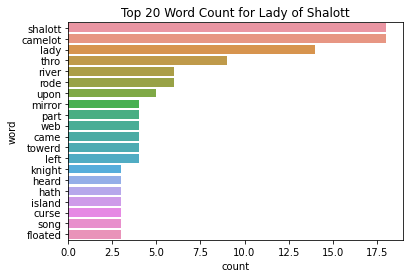

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

Lady_list = []
Lady_list.append(Lady)
Lady_df = pd.DataFrame(Lady_list)
Lady_df = Lady_df.transpose()
Lady_df.reset_index(inplace=True)
Lady_df.columns = ['word','count']
Lady_df = Lady_df.sort_values('count', ascending = False)


sns.barplot(data = Lady_df[0:20],
           x = "count", y = "word").set_title("Top 20 Word Count for Lady of Shalott")

plt.xlim(0, 19)

(0.0, 12.0)

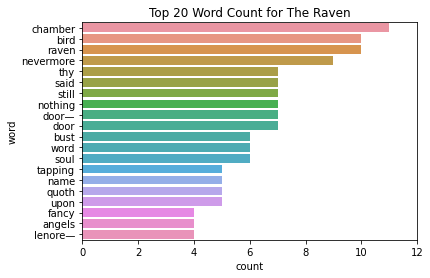

In [51]:
Raven_list = []
Raven_list.append(Raven)
Raven_df = pd.DataFrame(Raven_list)
Raven_df = Raven_df.transpose()
Raven_df.reset_index(inplace=True)
Raven_df.columns = ['word','count']
Raven_df = Raven_df.sort_values('count', ascending = False)


sns.barplot(data = Raven_df[0:20],
           x = "count", y = "word").set_title("Top 20 Word Count for The Raven")
plt.xlim(0, 12)

(0.0, 5.0)

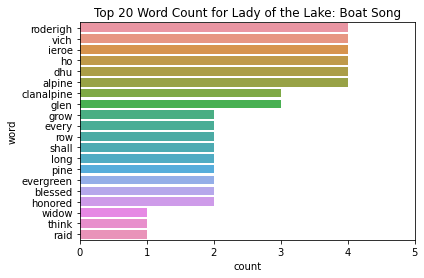

In [52]:
Boat_list = []
Boat_list.append(Boat)
Boat_df = pd.DataFrame(Boat_list)
Boat_df = Boat_df.transpose()
Boat_df.reset_index(inplace=True)
Boat_df.columns = ['word','count']
Boat_df = Boat_df.sort_values('count', ascending = False)


sns.barplot(data = Boat_df[0:20],
           x = "count", y = "word").set_title("Top 20 Word Count for Lady of the Lake: Boat Song")
plt.xlim(0, 5)

(0.0, 7.0)

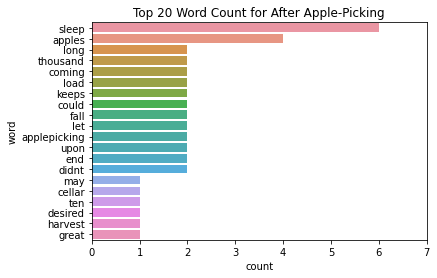

In [53]:
Apple_list = []
Apple_list.append(Apple)
Apple_df = pd.DataFrame(Apple_list)
Apple_df = Apple_df.transpose()
Apple_df.reset_index(inplace=True)
Apple_df.columns = ['word','count']
Apple_df = Apple_df.sort_values('count', ascending = False)


appleplot = sns.barplot(data = Apple_df[0:20],
           x = "count", y = "word").set_title("Top 20 Word Count for After Apple-Picking")
plt.xlim(0, 7)


(0.0, 2.0)

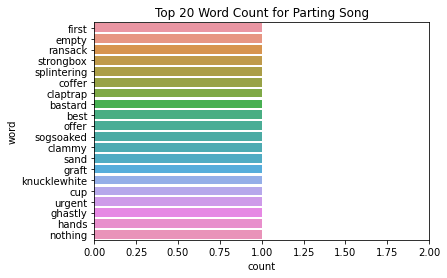

In [54]:
Parting_list = []
Parting_list.append(Parting)
Parting_df = pd.DataFrame(Parting_list)
Parting_df = Parting_df.transpose()
Parting_df.reset_index(inplace=True)
Parting_df.columns = ['word','count']
Parting_df = Parting_df.sort_values('count', ascending = False)


sns.barplot(data = Parting_df[0:20],
           x = "count", y = "word").set_title("Top 20 Word Count for Parting Song")
plt.xlim(0, 2)

(0.0, 3.0)

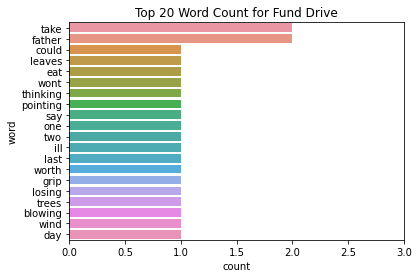

In [55]:
Fund_list = []
Fund_list.append(Fund)
Fund_df = pd.DataFrame(Fund_list)
Fund_df = Fund_df.transpose()
Fund_df.reset_index(inplace=True)
Fund_df.columns = ['word','count']
Fund_df = Fund_df.sort_values('count', ascending = False)


sns.barplot(data = Fund_df[0:20],
           x = "count", y = "word").set_title("Top 20 Word Count for Fund Drive")
plt.xlim(0, 3)

#### Comparing counts of words to other words and to total text

In [56]:
maxword_info_gold = []

for dictionary in wordcountlist_gold:
    totalwordcount = len(dictionary)
    maxword = ''
    maxwordcount = 0
    secondmaxword = 0
    secondmaxwordcount = 0
    thirdmaxword = 0
    thirdmaxwordcount = 0
    for key in dictionary:
        if dictionary[key] > maxwordcount:
            maxword = key
            maxwordcount = dictionary[key]
    for key in dictionary:
        if key != maxword:
            if dictionary[key]>secondmaxwordcount:
                secondmaxword = key
                secondmaxwordcount = dictionary[key]
    for key in dictionary:
        if key != maxword and key != secondmaxword:
            if dictionary[key]>thirdmaxwordcount:
                thirdmaxword = key
                thirdmaxwordcount = dictionary[key]
    maxsum = maxwordcount+secondmaxwordcount+thirdmaxwordcount
    maxratio = maxsum/3
    maxlist = [maxword,maxwordcount,secondmaxword,secondmaxwordcount,thirdmaxword, thirdmaxwordcount, maxsum, maxratio]
    maxword_info_gold.append (maxlist)
    
maxword_info_gold

[['camelot', 18, 'shalott', 18, 'lady', 14, 50, 16.666666666666668],
 ['chamber', 11, 'raven', 10, 'bird', 10, 31, 10.333333333333334],
 ['roderigh', 4, 'vich', 4, 'alpine', 4, 12, 4.0],
 ['sleep', 6, 'apples', 4, 'long', 2, 12, 4.0],
 ['first', 1, 'one', 1, 'day', 1, 3, 1.0],
 ['father', 2, 'take', 2, 'could', 1, 5, 1.6666666666666667]]

In [57]:
import pandas as pd
import numpy as np

maxword_np_gold = np.array(maxword_info_gold)

maxword_df = pd.DataFrame(maxword_np_gold)
maxword_df.columns = ['1st max word','1st count','2nd max word','2nd count','3rd max word', '3rd count','max words sum', 'max words ratio']

maxword_df

,1st max word,1st count,2nd max word,2nd count,3rd max word,3rd count,max words sum,max words ratio
0,camelot,18,shalott,18,lady,14,50,16.666666666666668
1,chamber,11,raven,10,bird,10,31,10.333333333333334
2,roderigh,4,vich,4,alpine,4,12,4.0
3,sleep,6,apples,4,long,2,12,4.0
4,first,1,one,1,day,1,3,1.0
5,father,2,take,2,could,1,5,1.6666666666666667


#### Combining word data with poem data

In [58]:
goldstandard_df['max words sum'] = maxword_df['max words sum']
goldstandard_df['max words ratio'] = maxword_df['max words ratio']
goldstandard_df

,Title,fulltext,gold_label,quotes,max words sum,max words ratio
0,Lady of Shalott,Part I On either side the river lie Long f...,ballad,10,50,16.666666666666668
1,The Raven,"Once upon a midnight dreary, while I pondered...",ballad,60,31,10.333333333333334
2,Lady of the Lake: Boat Song,Hail to the Chief who in triumph advances! H...,ballad,8,12,4.0
3,After Apple-Picking,My long two-pointed ladder's sticking through...,not a ballad,0,12,4.0
4,Parting Song,First it is one day without you. Then two. A...,not a ballad,0,3,1.0
5,Fund Drive,"She could be a Norman Rockwell painting, the...",not a ballad,0,5,1.6666666666666667


## Given the above data, the conditions for identifying a poem as a ballad will be that there must be at least 2 quotation marks and the max words ratio must be at least 4.

# Part Three - Calculating criteria for Poem list

#### Reminder of what is in the dataset

In [59]:
poem_df

,Title,fulltext,gold_label,quotes,max words sum,max words ratio,prediction
0,The Hunting of the Snark,"Fit the First The Landing ""Just the place ...",ballad,183,85,28.333333333333332,ballad
1,Casey at the bat,"A Ballad of the Republic, Sung in the Year 18...",ballad,10,27,9.0,ballad
2,Annabel Lee,"It was many and many a year ago, In a kingdo...",not a ballad,0,20,6.666666666666667,not a ballad
3,The Best Game the Fairies Play,"The best game the fairies play, The best ga...",not a ballad,0,7,2.3333333333333335,not a ballad
4,The Cremation of Sam McGee,There are strange things done in the midnight...,ballad,20,20,6.666666666666667,ballad
5,Don’t Worry if Your Job is Small,"Don't worry if your job is small, And your r...",not a ballad,0,3,1.0,not a ballad
6,The Highwayman,P ART O NE The wind was a torrent of darkne...,ballad,4,36,12.0,ballad
7,I Love to Do My Homework,"I love to do my homework, It makes me feel s...",not a ballad,0,7,2.3333333333333335,not a ballad
8,Jabberwocky,"’Twas brillig, and the slithy toves Did gyre...",ballad,4,7,2.3333333333333335,not a ballad
9,John Henry,When John Henry was a little tiny baby Sitti...,ballad,16,46,15.333333333333334,ballad


#### Counting Quotes

In [60]:
fulltext_poem = []

for entry in poem_df['fulltext']:
    fulltext_poem.append(entry)
    
type(fulltext_poem)

list

In [61]:
quotescount_poem = countquotes(fulltext_poem)

In [62]:
print(type(quotescount_poem))
print(len(quotescount_poem))
print(quotescount_poem)

<class 'list'>
18
[183, 10, 0, 0, 20, 0, 4, 0, 4, 16, 4, 0, 8, 0, 8, 0, 0, 0]


In [63]:
poem_df['quotes'] = quotescount_poem

In [64]:
poem_df

,Title,fulltext,gold_label,quotes,max words sum,max words ratio,prediction
0,The Hunting of the Snark,"Fit the First The Landing ""Just the place ...",ballad,183,85,28.333333333333332,ballad
1,Casey at the bat,"A Ballad of the Republic, Sung in the Year 18...",ballad,10,27,9.0,ballad
2,Annabel Lee,"It was many and many a year ago, In a kingdo...",not a ballad,0,20,6.666666666666667,not a ballad
3,The Best Game the Fairies Play,"The best game the fairies play, The best ga...",not a ballad,0,7,2.3333333333333335,not a ballad
4,The Cremation of Sam McGee,There are strange things done in the midnight...,ballad,20,20,6.666666666666667,ballad
5,Don’t Worry if Your Job is Small,"Don't worry if your job is small, And your r...",not a ballad,0,3,1.0,not a ballad
6,The Highwayman,P ART O NE The wind was a torrent of darkne...,ballad,4,36,12.0,ballad
7,I Love to Do My Homework,"I love to do my homework, It makes me feel s...",not a ballad,0,7,2.3333333333333335,not a ballad
8,Jabberwocky,"’Twas brillig, and the slithy toves Did gyre...",ballad,4,7,2.3333333333333335,not a ballad
9,John Henry,When John Henry was a little tiny baby Sitti...,ballad,16,46,15.333333333333334,ballad


#### Counting Words and Word Repetition in each poem

In [65]:
wordcountlist_poem = []

for line in fulltext_poem:
    countdict_poem = worddict(line)
    wordcountlist_poem.append(countdict_poem)

In [66]:
for dictionary in wordcountlist_poem:
    print(len(dictionary))
    

1241
238
76
35
306
9
295
16
70
105
26
78
73
12
74
41
37
28


#### Comparing counts of words to other words and total text

In [67]:
maxword_info_poem = []

for dictionary in wordcountlist_poem:
    totalwordcount = len(dictionary)
    maxword = ''
    maxwordcount = 0
    secondmaxword = 0
    secondmaxwordcount = 0
    thirdmaxword = 0
    thirdmaxwordcount = 0
    for key in dictionary:
        if dictionary[key] > maxwordcount:
            maxword = key
            maxwordcount = dictionary[key]
    for key in dictionary:
        if key != maxword:
            if dictionary[key]>secondmaxwordcount:
                secondmaxword = key
                secondmaxwordcount = dictionary[key]
    for key in dictionary:
        if key != maxword and key != secondmaxword:
            if dictionary[key]>thirdmaxwordcount:
                thirdmaxword = key
                thirdmaxwordcount = dictionary[key]
    maxsum = maxwordcount+secondmaxwordcount+thirdmaxwordcount
    maxratio = maxsum/3
    maxlist = [maxword,maxwordcount,secondmaxword,secondmaxwordcount,thirdmaxword, thirdmaxwordcount, maxsum, maxratio]
    maxword_info_poem.append (maxlist)
    
maxword_info_poem

[['snark', 29, 'bellman', 29, 'said', 27, 85, 28.333333333333332],
 ['casey', 13, 'caseys', 9, 'upon', 5, 27, 9.0],
 ['sea', 7, 'annabel', 7, 'lee', 6, 20, 6.666666666666667],
 ['best', 3, 'game', 2, 'go', 2, 7, 2.3333333333333335],
 ['cold', 7, 'sam', 7, 'mcgee', 6, 20, 6.666666666666667],
 ['dont', 1, 'worry', 1, 'job', 1, 3, 1.0],
 ['moonlight', 19, 'daughter', 9, 'landlords', 8, 36, 12.0],
 ['love', 4, 'homework', 2, 'makes', 1, 7, 2.3333333333333335],
 ['jabberwock', 3, 'twas', 2, 'brillig', 2, 7, 2.3333333333333335],
 ['lord', 20, 'john', 13, 'henry', 13, 46, 15.333333333333334],
 ['robin', 6, 'little', 4, 'pussycat', 4, 14, 4.666666666666667],
 ['mr', 4, 'nobody', 4, 'always', 3, 11, 3.6666666666666665],
 ['pussy', 5, 'ring', 4, 'nose', 4, 13, 4.333333333333333],
 ['peanut', 1, 'sat', 1, 'railroad', 1, 3, 1.0],
 ['unpredictable', 2, 'piece', 2, 'pump', 2, 6, 2.0],
 ['luve', 6, 'thee', 4, 'dear', 3, 13, 4.333333333333333],
 ['pie', 2, 'king', 2, 'sing', 1, 5, 1.6666666666666667],

In [68]:
maxword_np_poem = np.array(maxword_info_poem)

maxword_df_poem = pd.DataFrame(maxword_np_poem)
maxword_df_poem.columns = ['1st max word','1st count','2nd max word','2nd count','3rd max word', '3rd count','max words sum', 'max words ratio']

maxword_df_poem

,1st max word,1st count,2nd max word,2nd count,3rd max word,3rd count,max words sum,max words ratio
0,snark,29,bellman,29,said,27,85,28.333333333333332
1,casey,13,caseys,9,upon,5,27,9.0
2,sea,7,annabel,7,lee,6,20,6.666666666666667
3,best,3,game,2,go,2,7,2.3333333333333335
4,cold,7,sam,7,mcgee,6,20,6.666666666666667
5,dont,1,worry,1,job,1,3,1.0
6,moonlight,19,daughter,9,landlords,8,36,12.0
7,love,4,homework,2,makes,1,7,2.3333333333333335
8,jabberwock,3,twas,2,brillig,2,7,2.3333333333333335
9,lord,20,john,13,henry,13,46,15.333333333333334


#### Combining word data with poem data

In [69]:
poem_df['max words sum'] = maxword_df_poem['max words sum']
poem_df['max words ratio'] = maxword_df_poem['max words ratio']
poem_df

,Title,fulltext,gold_label,quotes,max words sum,max words ratio,prediction
0,The Hunting of the Snark,"Fit the First The Landing ""Just the place ...",ballad,183,85,28.333333333333332,ballad
1,Casey at the bat,"A Ballad of the Republic, Sung in the Year 18...",ballad,10,27,9.0,ballad
2,Annabel Lee,"It was many and many a year ago, In a kingdo...",not a ballad,0,20,6.666666666666667,not a ballad
3,The Best Game the Fairies Play,"The best game the fairies play, The best ga...",not a ballad,0,7,2.3333333333333335,not a ballad
4,The Cremation of Sam McGee,There are strange things done in the midnight...,ballad,20,20,6.666666666666667,ballad
5,Don’t Worry if Your Job is Small,"Don't worry if your job is small, And your r...",not a ballad,0,3,1.0,not a ballad
6,The Highwayman,P ART O NE The wind was a torrent of darkne...,ballad,4,36,12.0,ballad
7,I Love to Do My Homework,"I love to do my homework, It makes me feel s...",not a ballad,0,7,2.3333333333333335,not a ballad
8,Jabberwocky,"’Twas brillig, and the slithy toves Did gyre...",ballad,4,7,2.3333333333333335,not a ballad
9,John Henry,When John Henry was a little tiny baby Sitti...,ballad,16,46,15.333333333333334,ballad


# Part Four - Using Criteria to Predict if it is a ballad or not

In [70]:
poem_goldlabel = []

for entry in poem_df['gold_label']:
    poem_goldlabel.append(entry)


In [71]:
def predict(quotes,ratio):
    if quotes >= 2:
        if ratio >= 4.0:
            return "ballad"
        else:
            return "not a ballad"
    else:
        return "not a ballad"

In [72]:
quotes = []
ratio = []
prediction = []

for entry in poem_df['quotes']:
    quotes.append(float(entry))
    
for entry in poem_df['max words ratio']:
    ratio.append(float(entry))
    
for q,r in zip(quotes, ratio):
    if q >= 2 and r>= 4.0:
        prediction.append("ballad")
    else:
        prediction.append("not a ballad")

In [73]:
poem_df['prediction'] = prediction
poem_df

,Title,fulltext,gold_label,quotes,max words sum,max words ratio,prediction
0,The Hunting of the Snark,"Fit the First The Landing ""Just the place ...",ballad,183,85,28.333333333333332,ballad
1,Casey at the bat,"A Ballad of the Republic, Sung in the Year 18...",ballad,10,27,9.0,ballad
2,Annabel Lee,"It was many and many a year ago, In a kingdo...",not a ballad,0,20,6.666666666666667,not a ballad
3,The Best Game the Fairies Play,"The best game the fairies play, The best ga...",not a ballad,0,7,2.3333333333333335,not a ballad
4,The Cremation of Sam McGee,There are strange things done in the midnight...,ballad,20,20,6.666666666666667,ballad
5,Don’t Worry if Your Job is Small,"Don't worry if your job is small, And your r...",not a ballad,0,3,1.0,not a ballad
6,The Highwayman,P ART O NE The wind was a torrent of darkne...,ballad,4,36,12.0,ballad
7,I Love to Do My Homework,"I love to do my homework, It makes me feel s...",not a ballad,0,7,2.3333333333333335,not a ballad
8,Jabberwocky,"’Twas brillig, and the slithy toves Did gyre...",ballad,4,7,2.3333333333333335,not a ballad
9,John Henry,When John Henry was a little tiny baby Sitti...,ballad,16,46,15.333333333333334,ballad


#### Calculating Accuracy, Prediction, Recall, and F1

In [74]:
b_predict = []

for entry in prediction:
    if entry == "ballad":
        binary = True
    else:
        binary = False
    b_predict.append(binary)
    
b_goldlabel = []

for entry in poem_goldlabel:
    if entry == "ballad":
        binary = True
    else:
        binary = False
    b_goldlabel.append(binary)   
    
print(len(b_predict),len(b_goldlabel))

18 18


In [75]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

accuracy = accuracy_score(b_goldlabel, b_predict)
precision = precision_score(b_goldlabel, b_predict)
recall = recall_score(b_goldlabel, b_predict)
f1 = f1_score(b_goldlabel, b_predict)

print("Accuracy: {}".format(accuracy))
print("Precision: {}".format(precision))
print("Recall:  {}".format(recall))
print("F1: {}".format(f1))


Accuracy: 0.9444444444444444
Precision: 1.0
Recall:  0.875
F1: 0.9333333333333333
